In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [3]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("shape of train data:"+str(train_data.shape))
print("test data shape:"+str(test_data.shape))

shape of train data:(891, 12)
test data shape:(418, 11)


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data['Age'].fillna(np.mean(train_data['Age']),inplace=True)
test_data['Age'].fillna(np.mean(train_data['Age']),inplace=True)

In [10]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)
test_data['Fare'].fillna(np.mean(train_data['Fare']),inplace=True)

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [13]:
categorical_variables=train_data.dtypes[train_data.dtypes=='object'].index.values

In [14]:
train_data[categorical_variables].apply(lambda x: len(x.unique()))

Name        891
Sex           2
Ticket      681
Cabin       148
Embarked      3
dtype: int64

In [15]:
test_data[categorical_variables].apply(lambda x: len(x.unique()))

Name        418
Sex           2
Ticket      363
Cabin        77
Embarked      3
dtype: int64

In [93]:
train_data[train_data['Survived']==1].apply(lambda x: len(x.unique()))

PassengerId    342
Survived         1
Pclass           3
Name           342
Sex              2
Age             66
SibSp            5
Parch            5
Ticket         260
Fare           153
Cabin          102
Embarked         3
dtype: int64

In [17]:
train_data[train_data['Survived']==1].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         0
dtype: int64

In [18]:
categorical_variables=[x for x in train_data.columns if train_data[x].dtypes=='O' and x not in ['Name','Ticket','Cabin']]

In [19]:
categorical_variables

['Sex', 'Embarked']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
from collections import defaultdict
d= defaultdict(LabelEncoder)

In [22]:
encoded_train_data=pd.DataFrame(data=train_data,copy=True)

In [23]:
encoded_test_data=pd.DataFrame(data=test_data,copy=True)

In [24]:
encoded_train_data[categorical_variables]=encoded_train_data[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))

In [25]:
encoded_test_data[categorical_variables]=encoded_test_data[categorical_variables].apply(lambda x: d[x.name].transform(x))

In [26]:
encoded_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [89]:
survived=train_data[train_data['Survived']==1]['Survived'].groupby(train_data['Fare']).count()
non_survived=train_data[train_data['Survived']==0]['Survived'].groupby(train_data['Fare']).count()

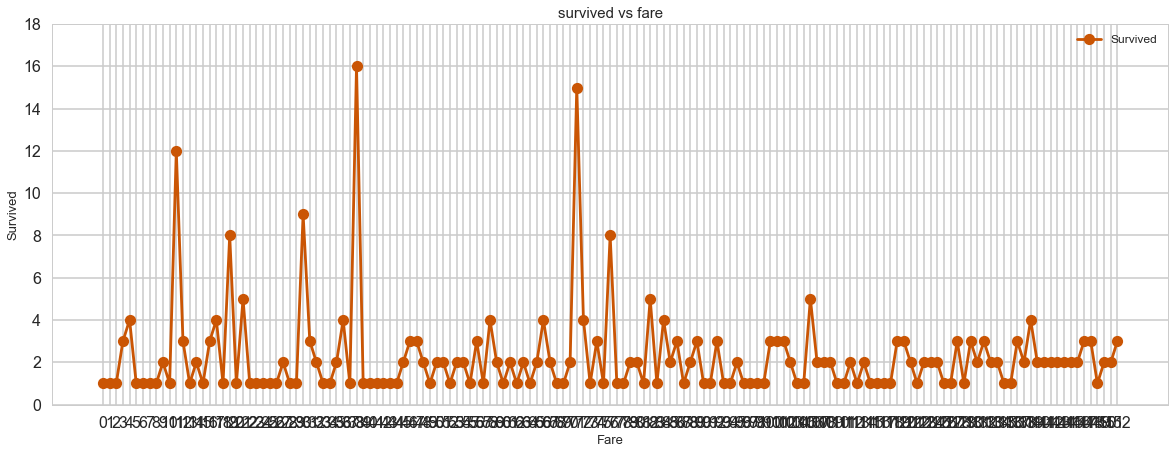

In [91]:
fig,ax=plt.subplots(figsize=(20,7))
d=np.arange(0,153)
ax.plot(d,survived,'-o',color='#CA5504',label='Survived')
ax.set_xlabel('Fare',fontsize=13)
ax.set_ylabel('Survived',fontsize=13)
ax.set_title('survived vs fare',fontsize=15)
ax.set_yticks(range(0,20,2))
ax.set_xticks(range(0,153))

plt.legend(fontsize=12)
plt.show()

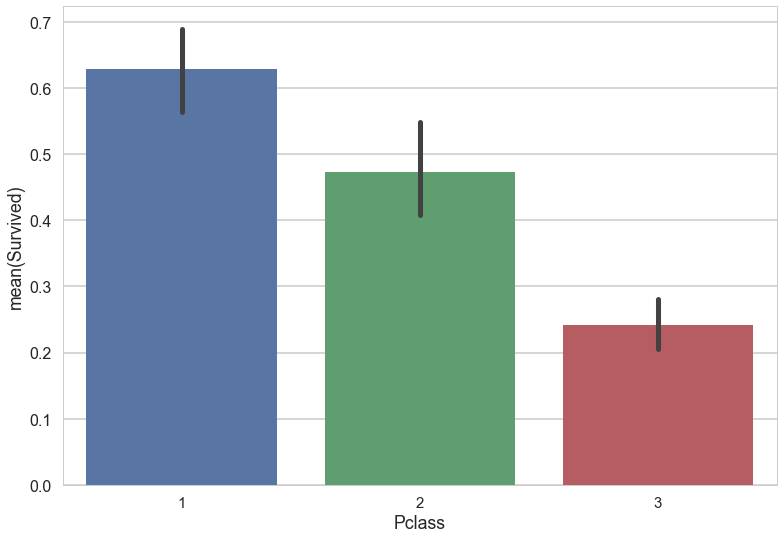

In [104]:
g=sns.barplot(x='Pclass',y='Survived',hue=None,data=train_data);
g.set_xticklabels(['1','2','3'],rotation=0,fontsize=15);

In [100]:
train_data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

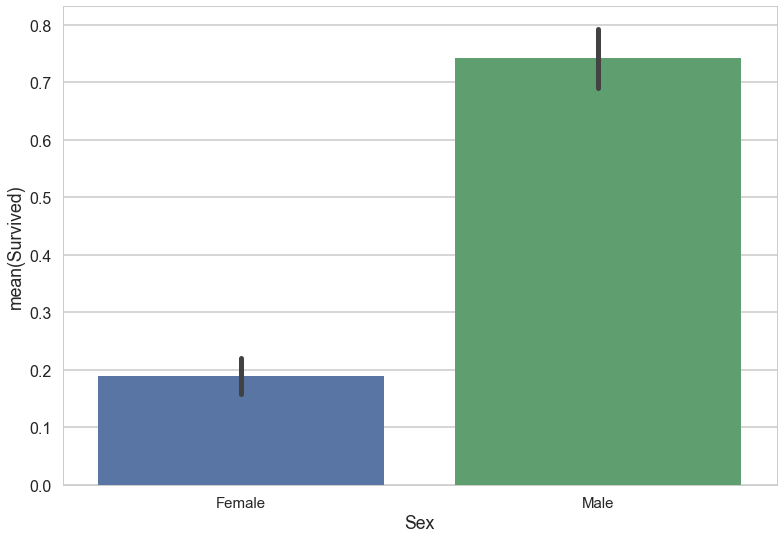

In [105]:
g=sns.barplot(x='Sex',y='Survived',hue=None,data=train_data);
g.set_xticklabels(['Female','Male'],rotation=0,fontsize=15);

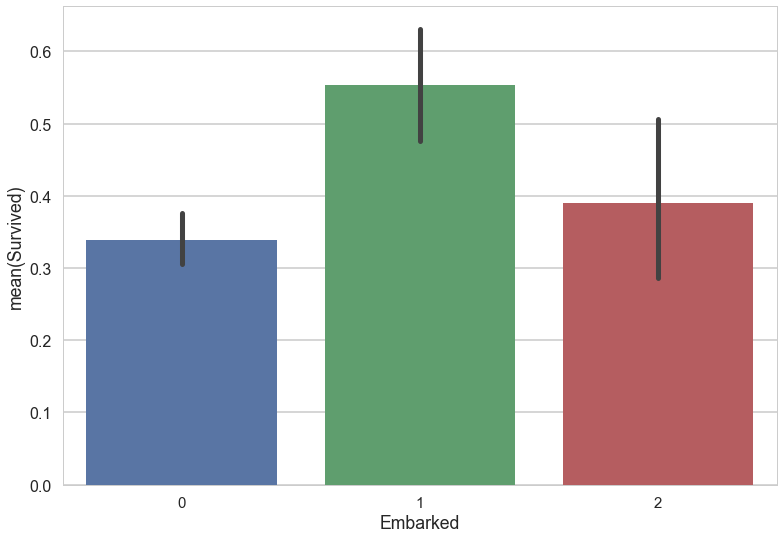

In [106]:
g=sns.barplot(x='Embarked',y='Survived',hue=None,data=train_data);
g.set_xticklabels(['0','1','2'],rotation=0,fontsize=15);

In [27]:
independent_variables=[ x for x in train_data.columns if x not in ['Ticket','Cabin','Name','PassengerId','Survived']]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test= train_test_split(encoded_train_data[independent_variables], encoded_train_data['Survived'], test_size=0.33, random_state= 0)

In [30]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\asus\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\asus\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [41]:
clsfr=LogisticRegression()
parameters = {"C": [0.01,0.05,0.1,0.5,1]}
fitmodel=GridSearchCV(clsfr,param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X_train,y_train)
fitmodel.best_estimator_,fitmodel.best_params_,fitmodel.best_score_,fitmodel.grid_scores_

(LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 0.1},
 0.7986577181208053,
 [mean: 0.70470, std: 0.01637, params: {'C': 0.01},
  mean: 0.76174, std: 0.02313, params: {'C': 0.05},
  mean: 0.79866, std: 0.01729, params: {'C': 0.1},
  mean: 0.79530, std: 0.02551, params: {'C': 0.5},
  mean: 0.79530, std: 0.02128, params: {'C': 1}])

In [42]:
clsfr=LogisticRegression(C=fitmodel.best_params_['C'])
clsfr.fit(X_train,y_train)
ypred=clsfr.predict(X_test)
accuracy_score(ypred, y_test)

0.7830508474576271

In [43]:
clsfr.score?

In [44]:
accuracy_score(y_test,ypred)

0.7830508474576271

In [45]:
clsfr.score?

In [46]:
clsfr.fit(encoded_train_data[independent_variables],encoded_train_data['Survived'])


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
test_predictions=clsfr.predict(encoded_test_data[independent_variables])

In [48]:
passenger_id=test_data['PassengerId']

In [49]:
submission=pd.DataFrame({
    'PassengerId': passenger_id,
    'Survived': test_predictions
})
submission.to_csv('titanic_sub1.csv', index= False)

### adaboost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

Object `cross_val_score` not found.


In [59]:
learning_rate=[0.01,0.1,1,2,5,10]
n_estimators=[10,50,100,150,200]
temp_score=0
scores=[]
for n in n_estimators:
    for lr in learning_rate:
        adam=AdaBoostClassifier(learning_rate=lr,n_estimators=n,random_state=0)
        score=(float('%0.5f'%(GridSearchCV(adam,param_grid=parameters, cv=5, scoring="accuracy").mean())))
        scores.append(score)
        if score>temp_score:
            temp_score=score
            lr_1=lr
            n_1=n
    
print("Maximum score(accuracy) obtained is:"+str(temp_score))
print("It is obtained at learning rate="+str(lr_1)+" and n_estimators="+str(n_1))

AttributeError: 'GridSearchCV' object has no attribute 'mean'